# Build ML models - for mostly full 7 KBps window

# K562
mC threshorld > 70%

In [1]:
# Save lasso_abs_coefs with todays date
import datetime     
today = datetime.date.today()
print("Today's date:", today)

Today's date: 2025-10-28


In [2]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap

In [3]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import sklearn
import shap

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time

import sys
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# # Import the module or specific functions
# # from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# # from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
# from funcs_extract_mC_profiles_from_BAMs import (
#     system_info,
#     get_reference_sequence,
#     create_output_directory,
#     extract_from_bam,
#     process_extracted_reads,
#     visualize_data,
#     create_padded_reads,
#     plot_padded_reads,
#     save_padded_reads,
#     remove_low_methylated_reads,
#     process_extracted_reads_no_fully_unmethylated,
#     create_padded_reads_no_fully_unmethylated,
#     current_time
#     # main,
# )
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads


current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print("Current Date and Time:", current_time)


def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs


modkit found with expected version 0.2.4
Current Date and Time: 2025-10-28 07:48:51


In [4]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [5]:

# # Day 35 post ElectroPoration (EP)
# ## Unedited D6
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
# save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD490_numRVS644.npy"

# CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_unedited_mc07_fracs = get_fractions(CGs_D6_unedited_mc07)
# print("CGs_D6_unedited_mc07 shape: ", CGs_D6_unedited_mc07.shape)
# print("CGs_D6_unedited_mc07_fracs shape: ", CGs_D6_unedited_mc07_fracs.shape)

# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
# save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
# CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_D6_unedited_mc0995_fracs = get_fractions(CGs_D6_unedited_mc0995)
# print("CGs_D6_unedited_mc0995 shape: ", CGs_D6_unedited_mc0995.shape)
# print("CGs_D6_unedited_mc0995_fracs shape: ", CGs_D6_unedited_mc0995_fracs.shape)   


# ## CRISPRoff Day 35 
# save_padded_reads_name_np =  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/Zoff_High/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_Zoff_High_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD802_numRVS1480.npy"
# CGs_D6_Zoff_High_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_Zoff_High_mc07_fracs = get_fractions(CGs_D6_Zoff_High_mc07)
# print("CGs_D6_Zoff_High_mc07 shape: ", CGs_D6_Zoff_High_mc07.shape)
# print("CGs_D6_Zoff_High_mc07_fracs shape: ", CGs_D6_Zoff_High_mc07_fracs.shape)


# save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/Zoff_High/analyze_single_reads/dimelo_v2_output/" +\
#      'CG_137_padded_reads_day6_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD793_numRVS1449.npy'
# # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/Zoff_High/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_Zoff_High_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy"
# CGs_D6_Zoff_High_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

# CGs_D6_Zoff_High_mc0995_fracs = get_fractions(CGs_D6_Zoff_High_mc0995)
# print("CGs_D6_Zoff_High_mc0995 shape: ", CGs_D6_Zoff_High_mc0995.shape)
# print("CGs_D6_Zoff_High_mc0995_fracs shape: ", CGs_D6_Zoff_High_mc0995_fracs.shape)     




In [6]:
# save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/model_data"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/model_data/"

folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/post_sort/ZFPoff_sortHIGH/analyze_single_reads/dimelo_v2_output/"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/Zoff_High/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD636_numRVS799.npy"
#  "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_Zoff_High_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_Zoff_High_mc07_fracs = get_fractions(CGs_Zoff_High_mc07)
print("CGs_Zoff_High_mc07 shape", CGs_Zoff_High_mc07.shape)
print("CGs_Zoff_High_mc07_fracs shape: ", CGs_Zoff_High_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path +  "CG_137_padded_reads_K562_ZFPoff_PostSort_HIGH_Day16_postEP_R9minion_threshold_mC0.995_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD635_numRVS798.npy"
# "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD104_numRVS222.npy"
CGs_Zoff_High_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_Zoff_High_mc0995_fracs = get_fractions(CGs_Zoff_High_mc0995)
print("CGs_Zoff_High_mc0995 shape:", CGs_Zoff_High_mc0995.shape)
print("CGs_Zoff_High_mc0995_fracs shape: ", CGs_Zoff_High_mc0995_fracs.shape)   

# # Day 35: unedited; 37hours sequenced
# folder_path= "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/part1_37h_sequenced/dimelo_v2_output/"


# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS115.npy"
# CGs_unedited_mc07_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_unedited_mc07_frac_lib1 = get_fractions(CGs_unedited_mc07_lib1)
# print("CGs_unedited_mc07_lib1 shape:", CGs_unedited_mc07_lib1.shape)
# print("CGs_unedited_mc07_fracs_lib1 shape: ", CGs_unedited_mc07_frac_lib1.shape)   

# save_padded_reads_name_np = folder_path + "CG_137_padded_reads_day35_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-05_units_combined_numFWD86_numRVS114.npy"
# CGs_unedited_mc0995_lib1 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
# CGs_unedited_mc0995_fracs_lib1 = get_fractions(CGs_unedited_mc0995_lib1)
# print("CGs_unedited_mc0995_lib1 shape:", CGs_unedited_mc0995_lib1.shape)
# print("CGs_unedited_mc0995_fracs_lib1 shape: ", CGs_unedited_mc0995_fracs_lib1.shape)   


folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/K562/unedited/analyze_single_reads/dimelo_v2_output/"
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_35/unedited/merged_2libraries/dimelo_v2_output/"

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_unedited_Day2_postEP_R9minion_threshold_mC0.7_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.7_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD88_numRVS118.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS115.npy"
CGs_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_unedited_mc07_fracs = get_fractions(CGs_unedited_mc07)
print("CGs_unedited_mc07 shape:", CGs_unedited_mc07.shape)
print("CGs_unedited_mc07_fracs shape: ", CGs_unedited_mc07_fracs.shape)   

save_padded_reads_name_np = folder_path + "CG_137_padded_reads_K562_unedited_Day2_postEP_R9minion_threshold_mC0.995_T2Tv2_0_filterMode10_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_T2Tv2_0_chr1:206583354-206589854_2025-10-28_units_combined_numFWD88_numRVS118.npy"
# "CG_137_padded_reads_day35_2Library_NT_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modeBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-10-13_units_combined_numFWD87_numRVS114.npy"
CGs_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_unedited_mc0995_fracs = get_fractions(CGs_unedited_mc0995)
print("CGs_unedited_mc0995 shape:", CGs_unedited_mc0995.shape)
print("CGs_unedited_mc0995_fracs shape: ", CGs_unedited_mc0995_fracs.shape)   

Padded reads loaded successfully.
CGs_Zoff_High_mc07 shape (1435, 137)
CGs_Zoff_High_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_Zoff_High_mc0995 shape: (1433, 137)
CGs_Zoff_High_mc0995_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_unedited_mc07 shape: (206, 137)
CGs_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_unedited_mc0995 shape: (206, 137)
CGs_unedited_mc0995_fracs shape:  (137,)


In [7]:
CGs_all_silenced = CGs_Zoff_High_mc07.copy()
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan,  1., ..., nan,  1., nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1.,  1.]]),
 (1435, 137))

In [8]:
# CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/Zoff_High/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_Zoff_High_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/Zoff_High/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD5_numRVS6.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy

# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

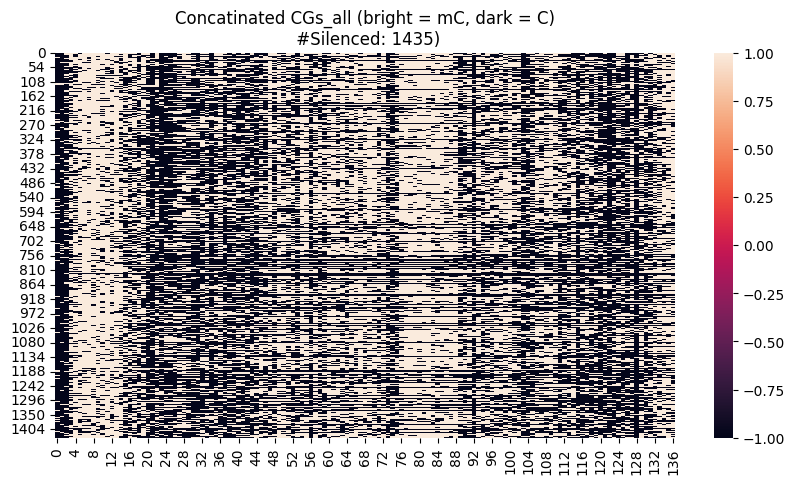

In [9]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


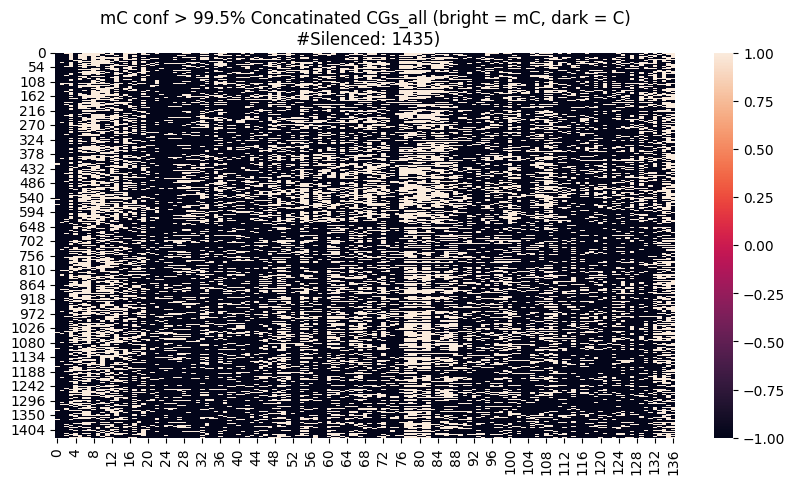

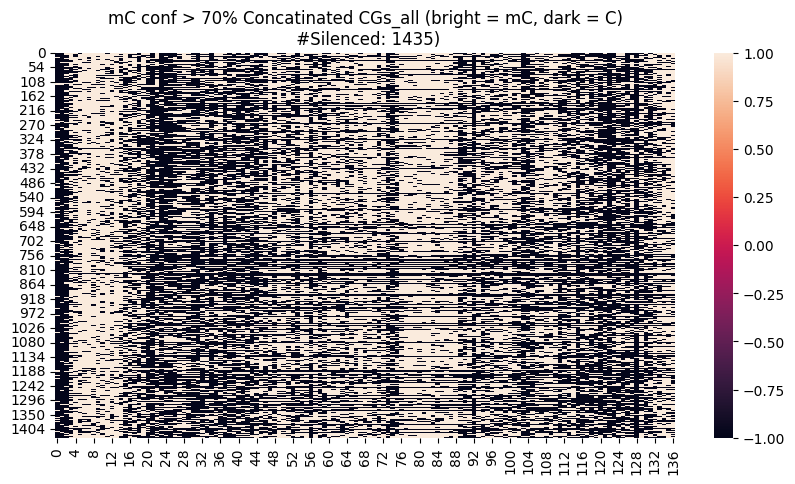

<Figure size 1000x500 with 0 Axes>

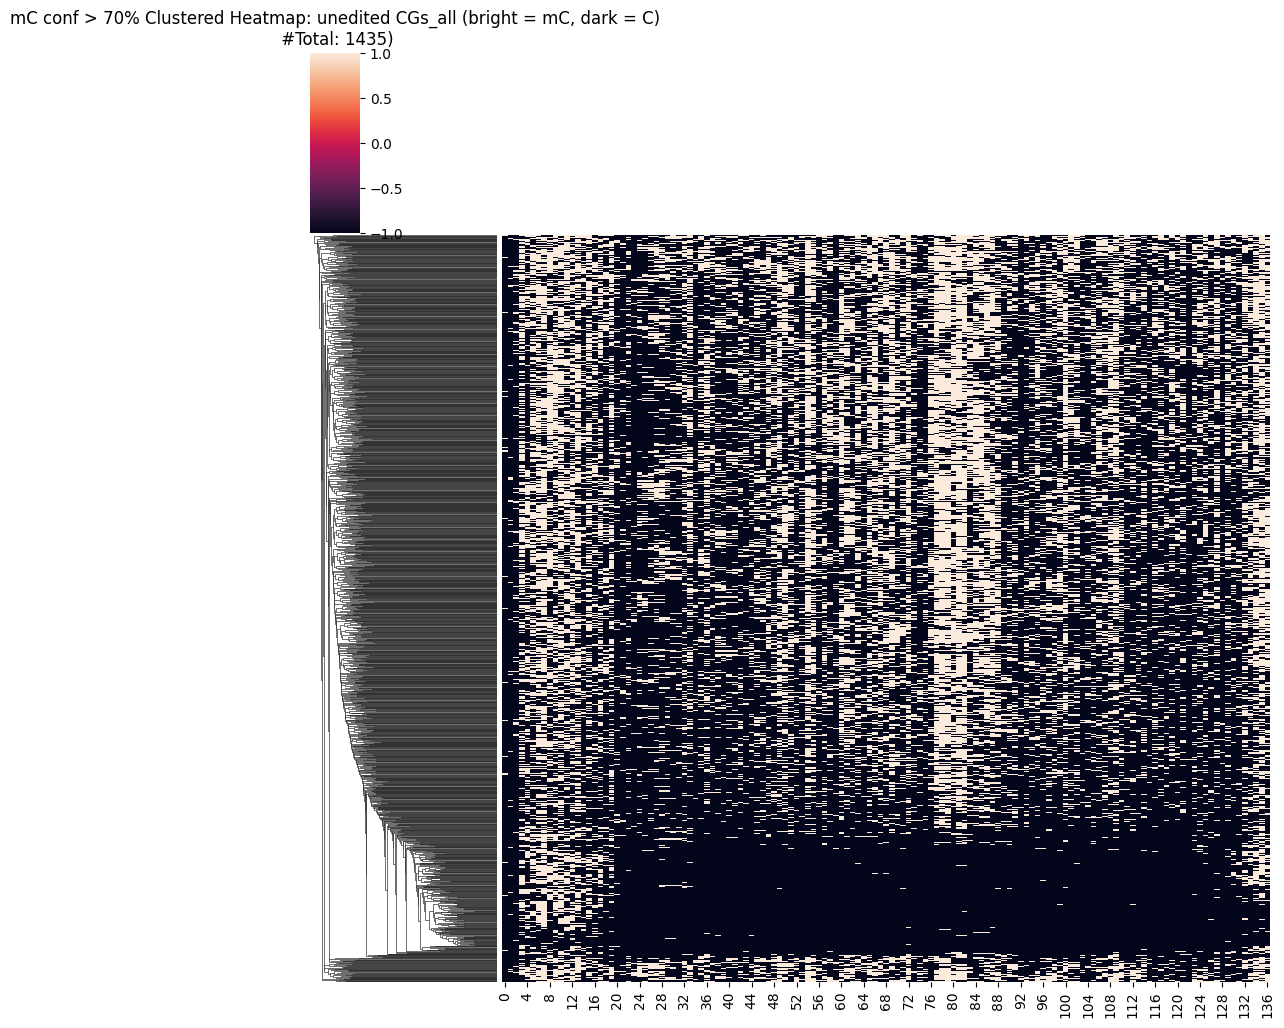

<Figure size 1000x500 with 0 Axes>

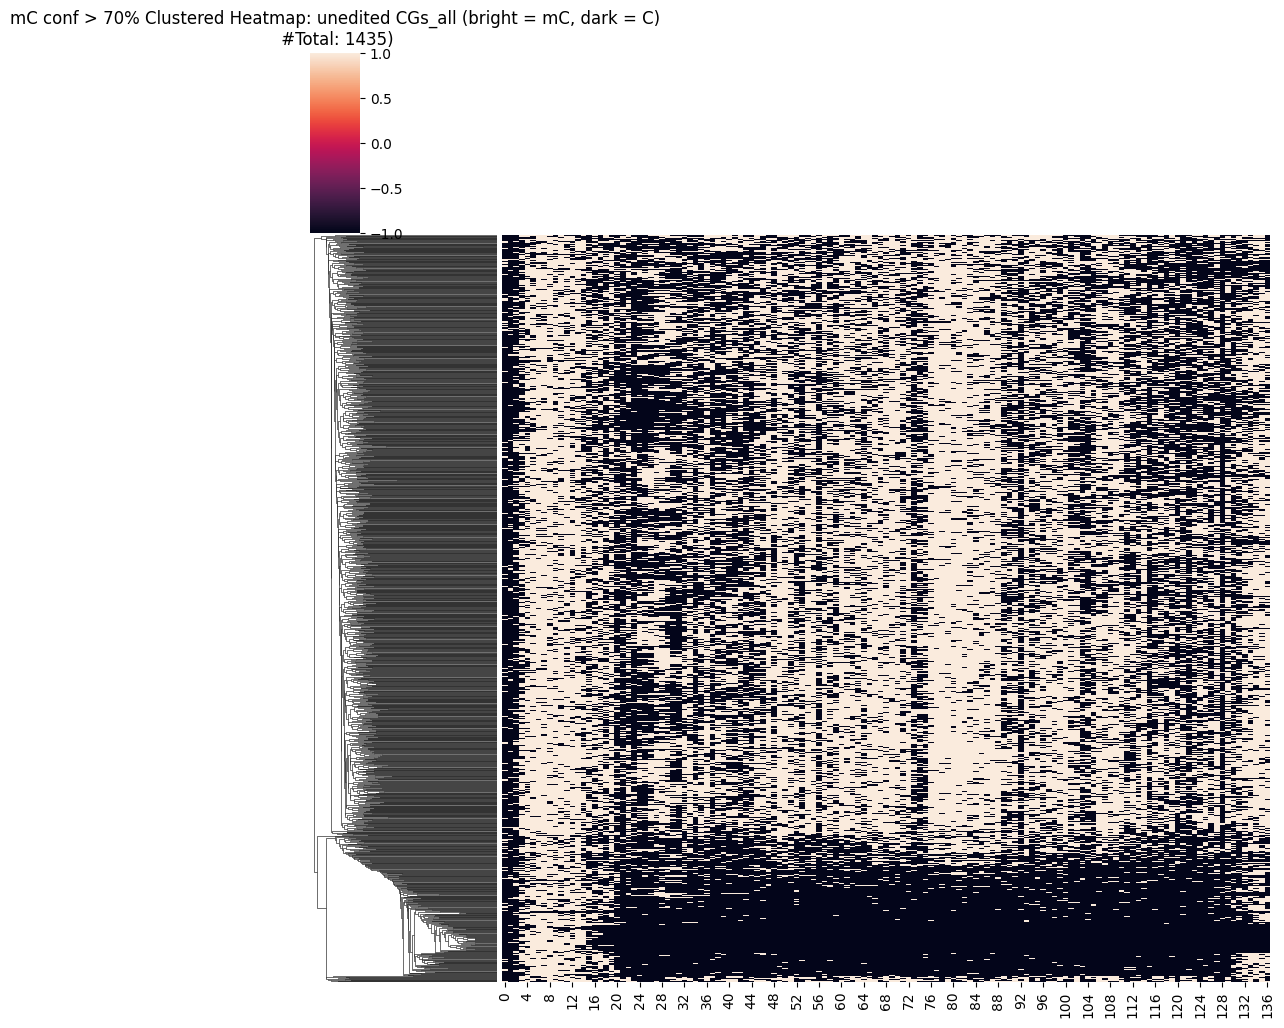

In [10]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_Zoff_High_mc0995).fillna(-1))
plt.title(f"mC conf > 99.5% Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()

# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_Zoff_High_mc07).fillna(-1))
plt.title(f"mC conf > 70% Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()
# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(pd.DataFrame(CGs_D6_Zoff_High_mc07).fillna(-1))
# plt.title(f"mC conf > 70% Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
# plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_Zoff_High_mc0995).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"mC conf > 70% Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced.shape[0]})")
plt.show()
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_Zoff_High_mc07).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"mC conf > 70% Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced.shape[0]})")
plt.show()

<Figure size 1000x500 with 0 Axes>

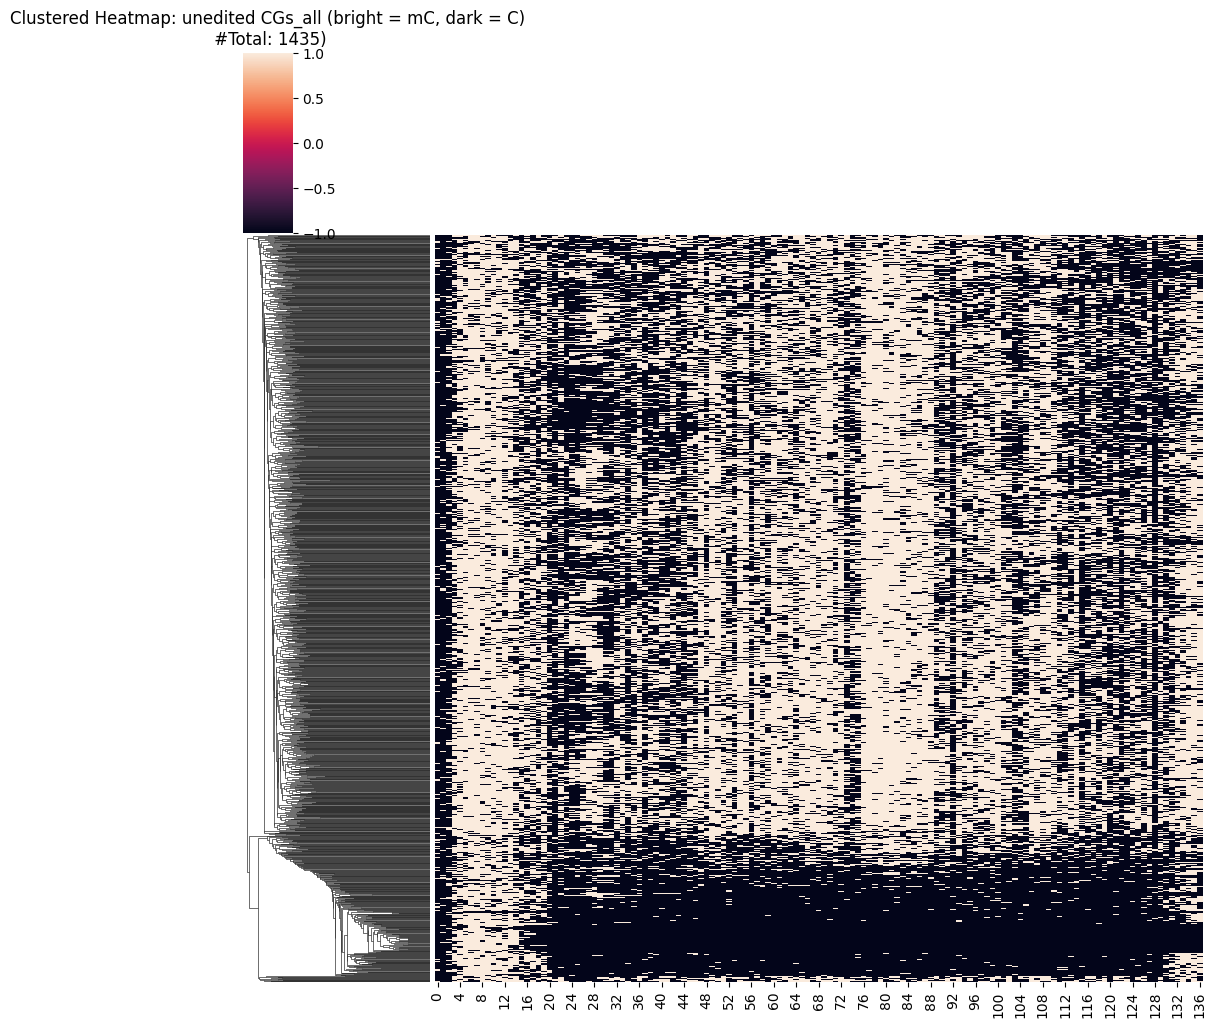

In [11]:
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced.shape[0]})")
plt.show()

In [12]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan,  1., ..., nan,  1., nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1.,  1.]]),
 (1435, 137))

# Remove the Reads (raws) that have very low methylation sum    

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 58 reads <= 10.0% methylation (among covered CpGs).
Total reads after filtering: 1377


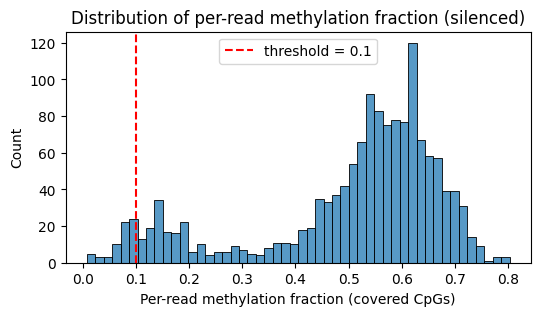

<Figure size 1000x500 with 0 Axes>

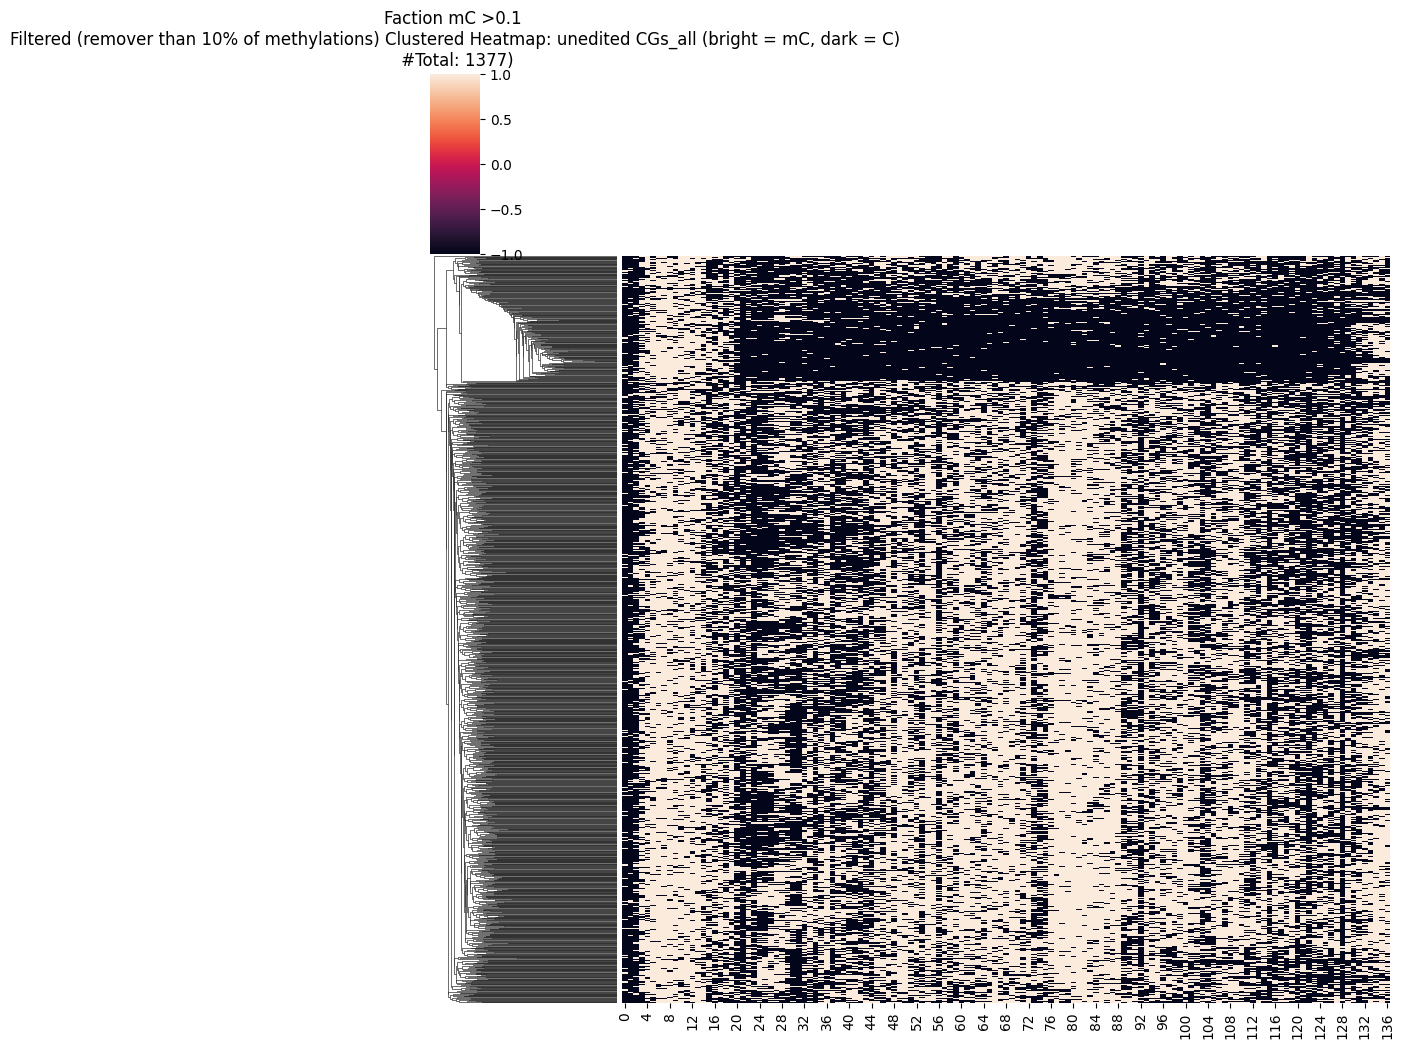

In [13]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.1  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 188 reads <= 20.0% methylation (among covered CpGs).
Total reads after filtering: 1247


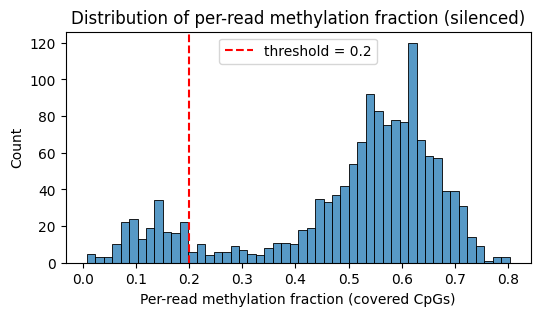

<Figure size 1000x500 with 0 Axes>

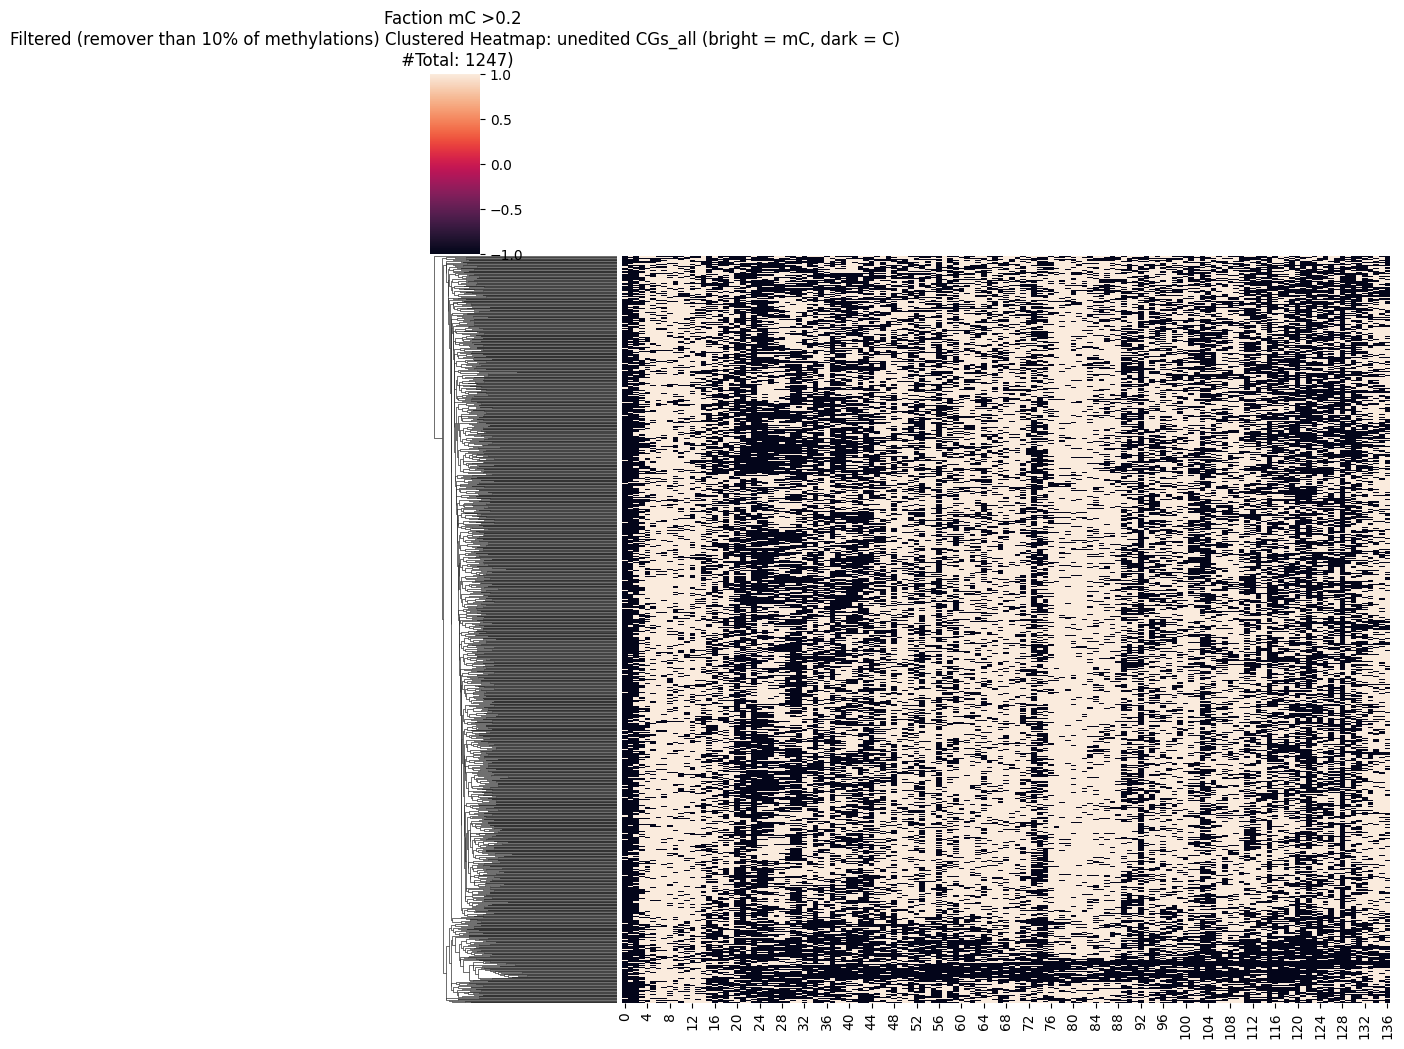

In [14]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.2  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 233 reads <= 30.0% methylation (among covered CpGs).
Total reads after filtering: 1202


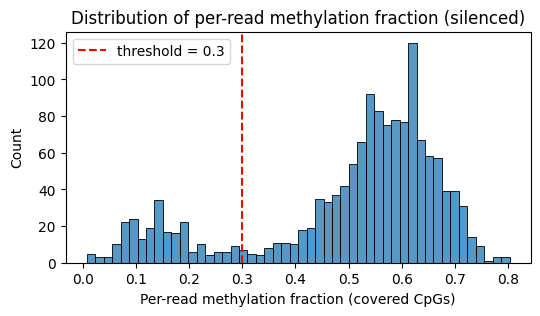

<Figure size 1000x500 with 0 Axes>

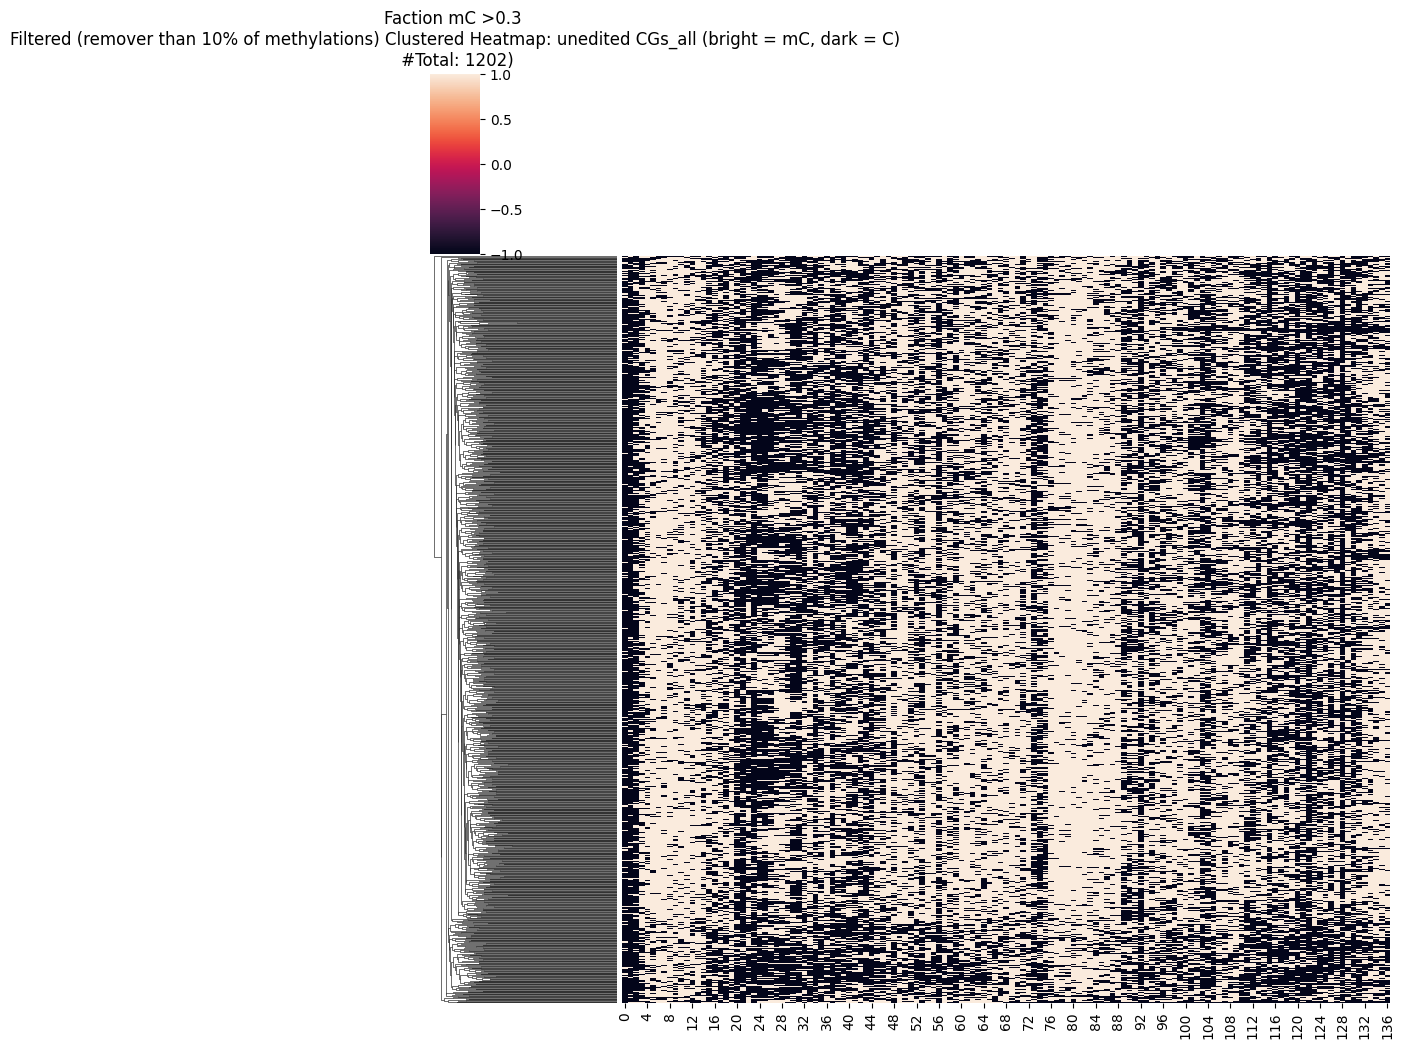

In [15]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.3  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 278 reads <= 40.0% methylation (among covered CpGs).
Total reads after filtering: 1157


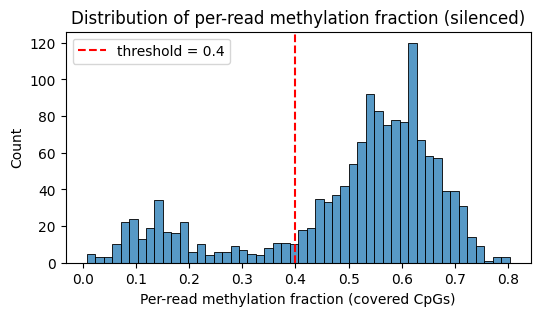

<Figure size 1000x500 with 0 Axes>

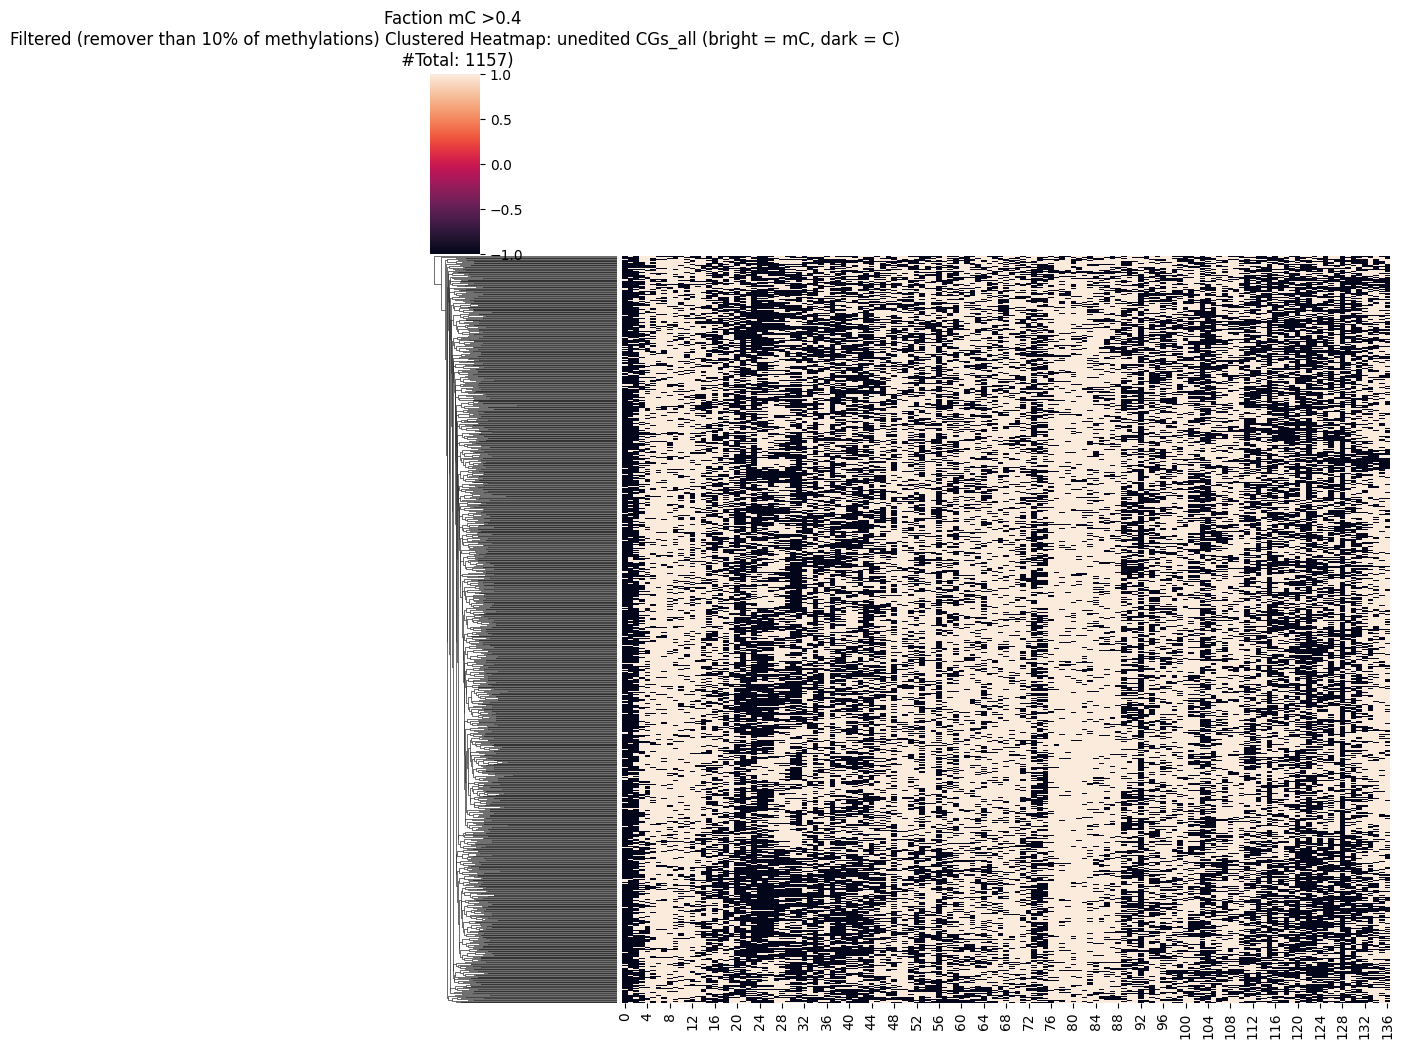

In [16]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.4  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 214 reads <= 26.0% methylation (among covered CpGs).
Total reads after filtering: 1221


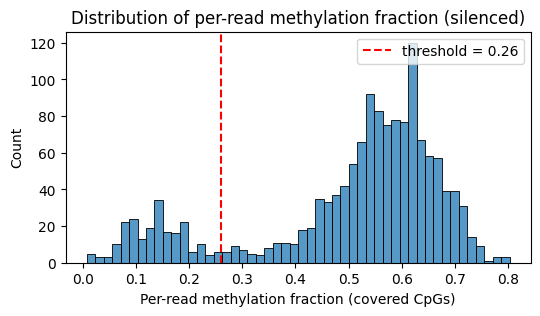

<Figure size 1000x500 with 0 Axes>

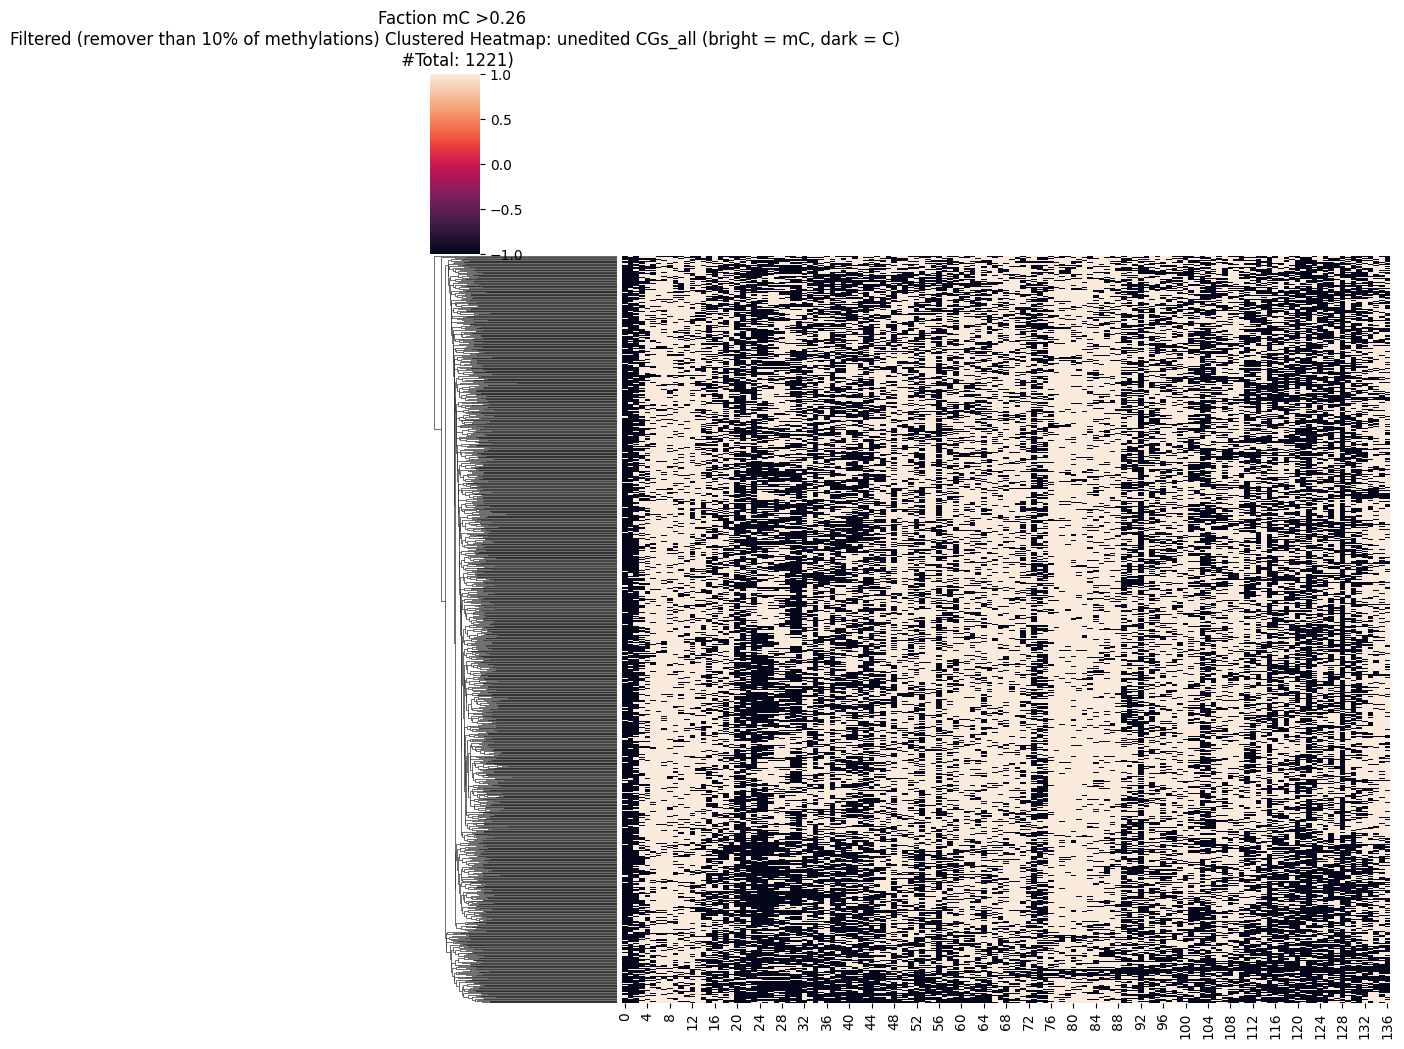

In [17]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.26  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

Total reads before filtering: 1435
Reads with zero covered CpGs: 0
Removed 233 reads <= 30.0% methylation (among covered CpGs).
Total reads after filtering: 1202


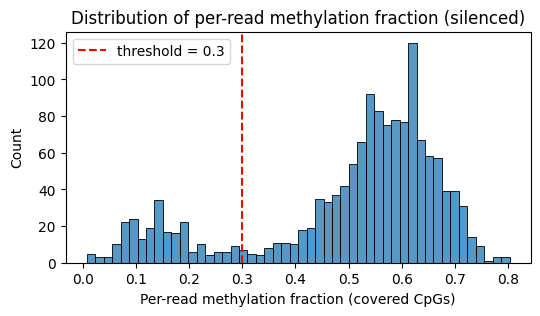

<Figure size 1000x500 with 0 Axes>

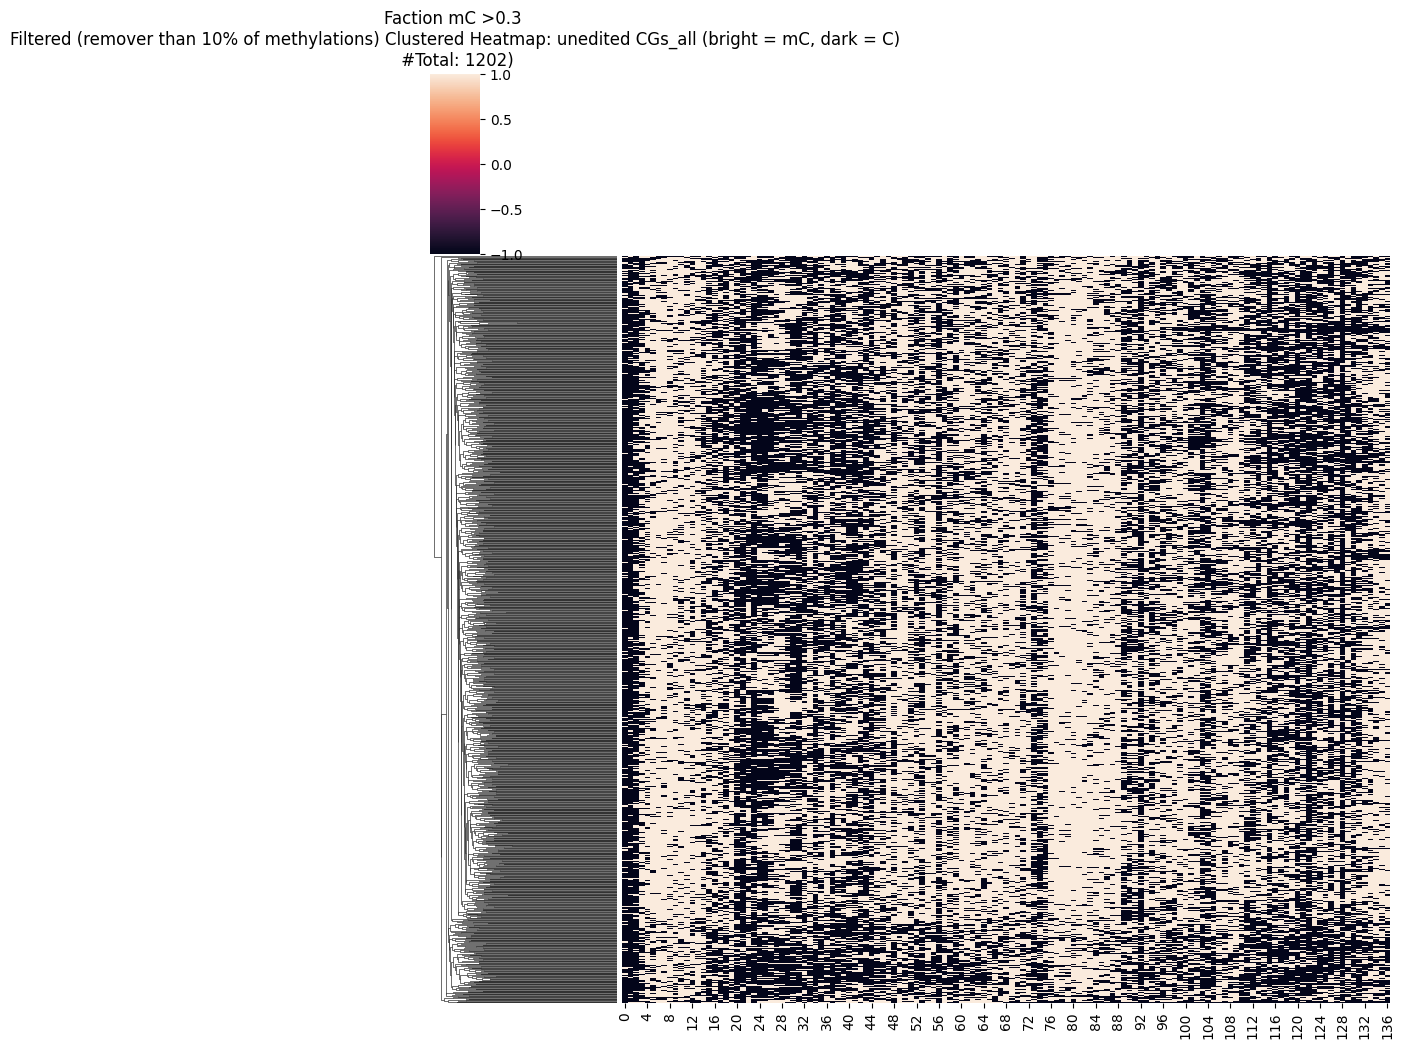

In [18]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.3  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFiltered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

<Figure size 1000x500 with 0 Axes>

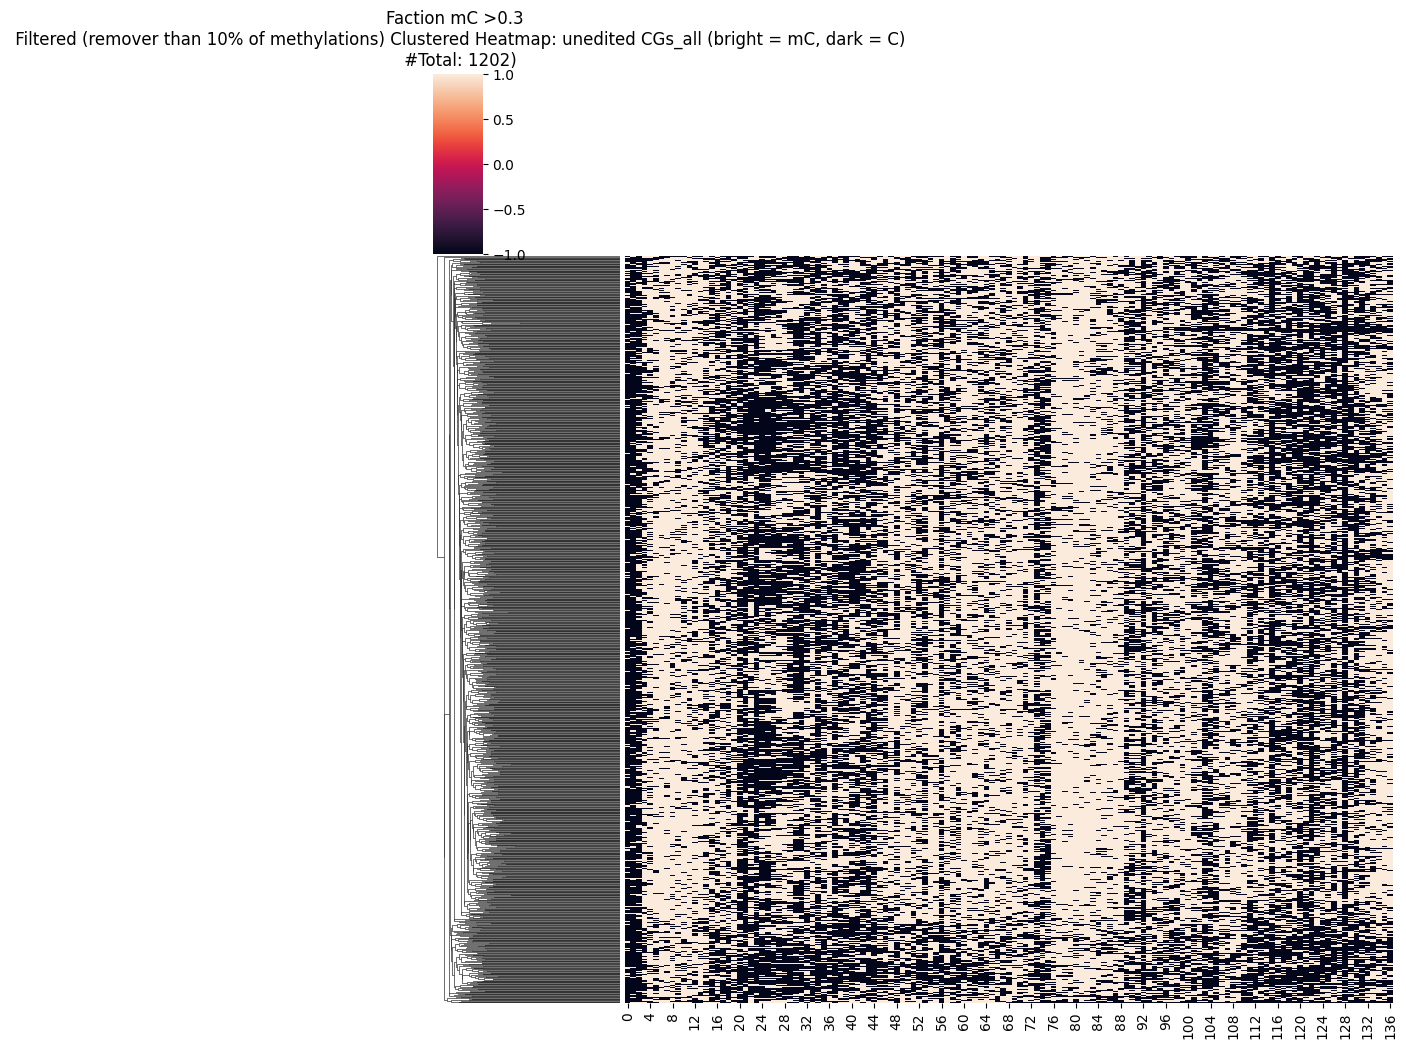

In [19]:
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \n Filtered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

In [20]:
silenced_low_methyl_frac_thresh = low_methyl_frac_thresh
silenced_low_methyl_frac_thresh

0.3

In [21]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
CGs_all_silenced_filtered_fracs.shape

(137,)

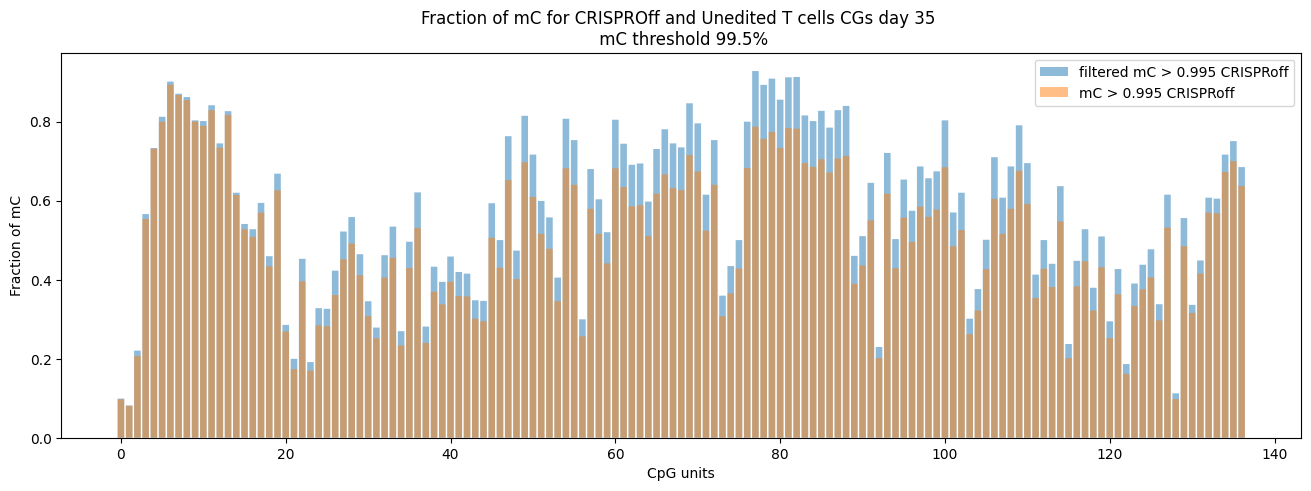

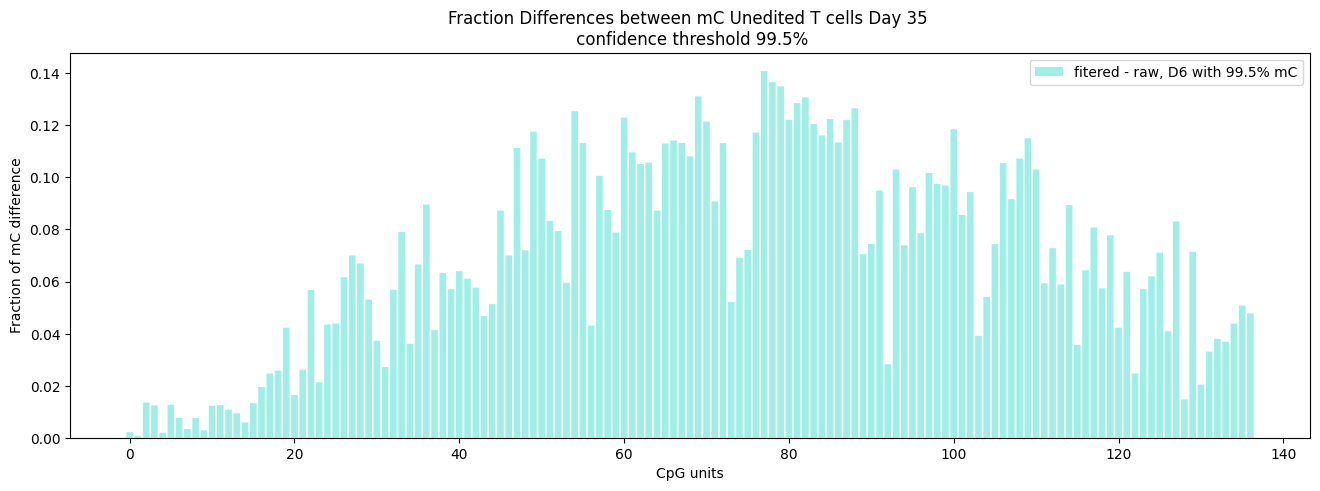

In [22]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
CGs_all_silenced_filtered_fracs.shape
CGs_all_silenced_fracs = get_fractions(CGs_all_silenced)
CGs_all_silenced_fracs.shape

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_silenced_filtered_fracs)), CGs_all_silenced_filtered_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff')# , color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =   CGs_all_silenced_filtered_fracs  - CGs_all_silenced_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered - raw, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [23]:
# valid_counts, methyl_counts

In [24]:
CGs_all_silenced = CGs_all_silenced_filtered.copy()
CGs_all_silenced, CGs_all_silenced.shape

(array([[nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1., nan],
        [nan, nan,  1., ..., nan,  1., nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan,  1.,  1.]]),
 (1202, 137))

# ===================================
# Unedited cells

In [ ]:
CGs_all_unedited = CGs_unedited_mc07.copy()
CGs_all_unedited.shape, CGs_all_unedited

In [ ]:
# CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_Zoff_High_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD6_numRVS16.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# CGs_all_unedited, CGs_all_unedited.shape

In [ ]:

# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_unedited_mc0995).fillna(-1))
plt.title(f"mC conf > 99.5% Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_unedited_mc0995).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"mC conf > 99.5% Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited.shape[0]})")
plt.show() 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_unedited_mc07).fillna(-1))
plt.title(f"mC conf > 99.5% Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_unedited_mc07).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"mC conf > 70% Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited.shape[0]})")
plt.show()



In [ ]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited.shape[0]})")
plt.show()


# Remove LOWest fraction of methylation reads

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.05  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.16  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.06  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.07  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.08  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [ ]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.1  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

In [29]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.03  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Faction mC >{low_methyl_frac_thresh} \nFilered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

NameError: name 'CGs_all_unedited' is not defined

In [28]:
unedit_low_methyl_frac_thresh = low_methyl_frac_thresh
unedit_low_methyl_frac_thresh

0.04

In [ ]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_unedited_filtered_fracs = get_fractions(CGs_all_unedited_filtered)
CGs_all_silenced_filtered_fracs.shape
CGs_all_unedited_fracs = get_fractions(CGs_all_unedited)
CGs_all_unedited_fracs.shape

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_unedited_filtered_fracs)), CGs_all_unedited_filtered_fracs, snap=False, alpha=0.5, label=f'Faction mC >{low_methyl_frac_thresh}')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='full')# , color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =   CGs_all_unedited_filtered_fracs  - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered - raw, D6 with 70% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [ ]:

# # CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
# # CGs_all_silenced_filtered_fracs.shape
# CGs_all_silenced_fracs = get_fractions(CGs_all_silenced)
# CGs_all_silenced_fracs.shape

# CGs_all_unedited_fracs = get_fractions(CGs_all_unedited)
# CGs_all_unedited_fracs.shape


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_silenced_filtered_fracs)), CGs_all_silenced_filtered_fracs, snap=False, alpha=0.5, label='filtered CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='filtered CRISPRoff')#, color='deepskyblue')

plt.bar(np.arange(len(CGs_all_unedited_filtered_fracs)), CGs_all_unedited_filtered_fracs, snap=False, alpha=0.5, label='filtered unedited')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='unedited')# , color='deepskyblue')

# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =     CGs_all_silenced_filtered_fracs - CGs_all_unedited_filtered_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered Zoff_High - NT, D6', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995=    CGs_all_silenced_fracs - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - NT, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered Zoff_High - NT, D6') #, color='turquoise'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - NT, D6') #, color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995_dif_dif =    dif_D6_mCthresh_995_filtered - dif_D6_mCthresh_995

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_dif_dif)), dif_D6_mCthresh_995_dif_dif, snap=False, alpha=0.5, label='DIF dif filered - raw (Zoff_High - NT), D6', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()



In [ ]:
CGs_all_unedited = CGs_all_unedited_filtered.copy()
CGs_all_unedited, CGs_all_unedited.shape

In [ ]:
# plot clustering of CGs_all_unedited and CGs_all_silenced
CGs_all_combined = np.vstack((CGs_all_unedited, CGs_all_silenced))
CGs_all_combined.shape  # (1621, 137)       
# labels = np.array(['Unedited'] * CGs_all_unedited.shape[0] + ['Silenced'] * CGs_all_silenced.shape[0])
labels = np.array(['NT'] * CGs_all_unedited.shape[0] + ['Zoff_High'] * CGs_all_silenced.shape[0])
labels.shape  # (1621,)             
labels          
# Heatmap of CGs_all_combined
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_combined).fillna(-1), yticklabels=labels)                                          
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_combined.shape[0]})")
plt.show()


In [ ]:
# # plot X_unedited_silenced 
# CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-400])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_unedited_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
# plt.show()


# Keep same amount of reads per condition

In [ ]:
# CGs_all_unedited = np.array(CGs_all_unedited_cut)
# CGs_all_unedited, CGs_all_unedited.shape

In [ ]:
if CGs_all_silenced.shape[0] > CGs_all_unedited.shape[0]:
    print("Silenced has more reads than unedited")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_silenced.shape[0]  # Total number of rows
    subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_silenced[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_silenced = subset
    CGs_all_silenced

else:
    print("Unedited has more reads than silenced")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_unedited.shape[0]  # Total number of rows
    subset_size = CGs_all_silenced.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_unedited[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_unedited = subset
    CGs_all_unedited


print("Final shapes after balancing:")
print(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0])

In [ ]:

# CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
# CGs_all_silenced_filtered_fracs.shape
CGs_all_silenced_fracs = get_fractions(CGs_all_silenced)
CGs_all_silenced_fracs.shape

CGs_all_unedited_fracs = get_fractions(CGs_all_unedited)
CGs_all_unedited_fracs.shape


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_silenced_filtered_fracs)), CGs_all_silenced_filtered_fracs, snap=False, alpha=0.5, label='filtered CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='CRISPRoff')#, color='deepskyblue')

plt.bar(np.arange(len(CGs_all_unedited_filtered_fracs)), CGs_all_unedited_filtered_fracs, snap=False, alpha=0.5, label='filtered unedited')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='unedited')# , color='deepskyblue')

# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 70%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =     CGs_all_silenced_filtered_fracs - CGs_all_unedited_filtered_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered Zoff_High - NT, D6', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995=    CGs_all_silenced_fracs - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - NT, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered Zoff_High - NT, D6') #, color='turquoise'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - NT, D6') #, color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995_dif_dif =    dif_D6_mCthresh_995_filtered - dif_D6_mCthresh_995

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_dif_dif)), dif_D6_mCthresh_995_dif_dif, snap=False, alpha=0.5, label='DIF dif filered - raw (Zoff_High - NT), D6', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 70%')
plt.legend()

# Show the plot
plt.show()



In [ ]:
CGs_all_silenced.shape, CGs_all_unedited.shape

In [ ]:
CGs_all_silenced.shape[0]

In [ ]:


plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff', color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs Day 35 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995 =   CGs_all_silenced_fracs  - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])

plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

# Save filtered reads

In [ ]:
mC_threshold = "07"

CGs_all_silenced_path_filtered= f'CGs_Zoff_High_filtered_{CGs_all_silenced.shape[0]}reads_{silenced_low_methyl_frac_thresh}mCfrac_mC{mC_threshold}_{today}.npy'
np.save(CGs_all_silenced_path_filtered, CGs_all_silenced)
CGs_all_silenced_path_filtered

In [ ]:
CGs_all_unedit_path_filtered= f'CGs_NT_filtered_{CGs_all_unedited.shape[0]}reads_{unedit_low_methyl_frac_thresh}mCfrac_mC{mC_threshold}_{today}.npy'
np.save(CGs_all_unedit_path_filtered, CGs_all_unedited)
CGs_all_unedit_path_filtered

In [ ]:
CGs_all_unedited_fracs

In [ ]:
CGs_all_silenced

In [ ]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

In [ ]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

In [ ]:
CGs_all_unedited.shape, CGs_all_silenced.shape

In [ ]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

In [ ]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [ ]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

In [ ]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

In [ ]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [ ]:
X.iloc[16:23,:]

In [ ]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [ ]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

In [ ]:
celltypes = ["unedited", "silenced"]
celltypes

In [ ]:
# model.coef_

In [ ]:
np.arange(1, 11)

In [ ]:
(model.coef_).shape[1]

In [ ]:
X_axis = np.arange(1, model.coef_.shape[1]+1)  # +1 # np.arange(10)+1
X_axis

In [ ]:
np.abs(model.coef_)

In [ ]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [ ]:
lasso_abs_coefs = np.abs(model.coef_[0])
print("lasso_abs_coefs.shape=",lasso_abs_coefs.shape, lasso_abs_coefs)

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis,lasso_abs_coefs) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [ ]:
lasso_abs_coefs = np.abs(model.coef_[0])
print("lasso_abs_coefs.shape=",lasso_abs_coefs.shape, lasso_abs_coefs)

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis,lasso_abs_coefs) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [ ]:
# Normalize the lasso coefficients to a 0-1 range
# lasso_abs_coefs_norm = (lasso_abs_coefs - np.min(lasso_abs_coefs)) / (np.max(lasso_abs_coefs) - np.min(lasso_abs_coefs))
lasso_abs_coefs_norm = (lasso_abs_coefs - np.min(lasso_abs_coefs)) / (np.max(lasso_abs_coefs) - np.min(lasso_abs_coefs))
print("Normalized LASSO coefficients:", lasso_abs_coefs_norm) 

# plot normalized coefficients
plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='Normalized LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )
plt.xlabel('CpG units')
plt.ylabel('Normalized LASSO Coefficient (0-1)')
plt.title('Normalized LASSO Coefficients for CpG sites distinguishing Zoff_High vs Unedited T cells Day 35')
plt.legend()
plt.show()  

In [ ]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='norm LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )
plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [ ]:

# plt.figure(figsize=(16, 5))
# plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
# plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='norm LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )
# plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='pink'  )

# # Add labels and title
# plt.xlabel('CpG units')
# plt.yticks(list(plt.yticks()[0]) + [-0.1])
# plt.ylabel('Fraction of mC difference')
# plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
# plt.legend()

# # Show the plot
# plt.show()

In [ ]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs_norm)), lasso_abs_coefs_norm, snap=False, alpha=0.5, label='norm LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )
# plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_HighHigh vs Unedited, D6 with 99.5% mC', color='pink'  )

# Add labels and title
plt.xlabel('CpG units')
plt.yticks(list(plt.yticks()[0]) + [-0.1])
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [ ]:

save_name="lasso_abs_coefs_silenced_unedited_K562_mCthresh0.995_"+str(today)+".npy"

np.save(save_name, lasso_abs_coefs)
save_name

In [ ]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, model.coef_[0]) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Raw Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [ ]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [ ]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [ ]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

In [ ]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances (test :100 data points)")

In [ ]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test)


In [ ]:

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances (test :100 data points)")

In [ ]:
shap_sumabs_coefs = np.sum(np.abs(shapvals.values), axis=0)

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, shap_sumabs_coefs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances on test set")

In [ ]:
# shap_sumabs_coefs = np.sum(np.abs(shapvals.values), axis=0)

# plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# # sumabs = np.sum(np.abs(shapvals.values), axis=0)
# plt.bar(X_axis, shap_sumabs_coefs)
# plt.xticks(X_axis)
# plt.xticks(X_axis, fontsize=6)
# plt.title("Global Abs SHAP Importances on test set")

In [ ]:
save_name="shap_sumabs_coefs_silenced_unedited_K562_mCthresh0.995_numReads"+str(len(CGs_all_silenced_filtered))+"_"+str(today)+".npy"

np.save(save_name, shap_sumabs_coefs)
save_name

In [ ]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(shapvals.values, axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global SHAP Importances")

In [ ]:
# plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# sumabs = np.sum(shapvals.values, axis=0)
# plt.bar(X_axis, sumabs)
# plt.xticks(X_axis)
# plt.xticks(X_axis, fontsize=6)
# plt.title("Global SHAP Importances")

In [ ]:
# plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# sumabs = np.sum(shapvals.values, axis=0)
# plt.bar(X_axis, sumabs)
# plt.xticks(X_axis)
# plt.xticks(X_axis, fontsize=6)
# plt.title("Global SHAP Importances")

In [ ]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

# Add a 1D CNN model + interpret

In [ ]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [ ]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [ ]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

In [ ]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


In [ ]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

In [ ]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

In [ ]:
# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.tight_layout()
plt.show()

In [ ]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


In [ ]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

In [ ]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [ ]:
features, test_results.importances_mean


In [ ]:
X_axis


In [ ]:
plt.figure(figsize=(16, 6))

# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
# plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller
plt.xticks(X_axis, fontsize=4)
plt.show()

In [ ]:
shifts

In [ ]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(20, 6))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [ ]:
plt.figure(figsize=(22, 6))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [ ]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='Zoff_High - Unedited, D6 with 99.5% mC', color='mediumblue'  )
plt.bar(np.arange(len(lasso_abs_coefs)), lasso_abs_coefs, snap=False, alpha=0.5, label='LASSO Abs values from LR on Zoff_High vs Unedited, D6 with 99.5% mC', color='magenta'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 35 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [ ]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

In [ ]:
celltypes

In [ ]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [ ]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [ ]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()